In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('../data/EK.csv')

/tmp/ipykernel_28618/3900498588.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/EK.csv')


In [3]:
df = df[(df['PERFORMANCE_EVENT_CODE'] == 'A') | (df['PERFORMANCE_EVENT_CODE'] == 'M')]
df

,FINANCIAL_YEAR_AND_PERIOD,ORIGIN_DEPARTURE_DATE,TRUST_TRAIN_ID_AFFECTED,PLANNED_ORIG_LOC_CODE_AFF,PLANNED_ORIG_GBTT_DATETIME_AFF,PLANNED_ORIG_WTT_DATETIME_AFF,PLANNED_DEST_LOC_CODE_AFFECTED,PLANNED_DEST_GBTT_DATETIME_AFF,PLANNED_DEST_WTT_DATETIME_AFF,TRAIN_SERVICE_CODE_AFFECTED,...,INCIDENT_DESCRIPTION,REACTIONARY_REASON_CODE,INCIDENT_RESPONSIBLE_TRAIN,PERFORMANCE_EVENT_CODE,START_STANOX,END_STANOX,EVENT_DATETIME,PFPI_MINUTES,RESP_TRAIN,REACT_TRAIN
30,2018/19_P01,2018-04-01,512J19MI01,51531.0,2018-04-01 11:08:00,2018-04-01 11:08:00,72419.0,2018-04-01 11:45:00,2018-04-01 11:43:00,21921000,...,2J22 POWER DEFECT UHL,YO,2J22,M,51558.0,72419.0,2018-04-01 11:49:00,6.0,722J22MI01,722J24MJ01
116,2018/19_P01,2018-04-01,522Y41MM01,52226.0,2018-04-01 13:05:00,2018-04-01 13:05:00,87219.0,2018-04-01 14:08:00,2018-04-01 14:07:00,22204000,...,5X80 DEPOT ACCEPTANCE XNP,YD,5X80,M,72237.0,72238.0,2018-04-01 14:16:00,26.0,235X801E01,235X801E01
117,2018/19_P01,2018-04-01,525M72M901,52051.0,NaN,2018-04-01 23:59:00,87584.0,NaN,2018-04-02 00:16:00,22216001,...,TAT CDN PSR ISSUE,YI,1G50,M,52051.0,52051.0,2018-04-02 00:05:00,0.0,871G50MG23,879M72M901
146,2018/19_P01,2018-04-01,522N01M701,52226.0,2018-04-01 21:15:00,2018-04-01 21:15:00,87132.0,2018-04-01 22:16:00,2018-04-01 22:16:00,22214000,...,BSY ANIMAL ON TRACK,NaN,NaN,M,72419.0,72275.0,2018-04-01 22:01:00,5.0,NaN,NaN
165,2018/19_P01,2018-04-01,522N83MX01,52226.0,2018-04-01 18:55:00,2018-04-01 18:55:00,87132.0,2018-04-01 19:56:00,2018-04-01 19:55:00,22214000,...,ACWLJN-WJH POWER FLR,NaN,NaN,M,72251.0,87138.0,2018-04-01 19:52:00,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790296,2023/24_P02,2023-05-27,889F58MZ27,88392.0,2023-05-27 20:12:00,2023-05-27 20:12:00,52074.0,2023-05-27 20:34:00,2023-05-27 20:34:00,22218000,...,9C47 DISORDER ZLW ZCW,YI,9C47,M,88392.0,88392.0,2023-05-27 20:17:00,5.0,529C47MU27,529E57MY27
790299,2023/24_P02,2023-05-27,889F67M827,88392.0,2023-05-27 22:27:00,2023-05-27 22:27:00,52074.0,2023-05-27 22:49:00,2023-05-27 22:49:00,22218000,...,9C62 PASS COMM NXG NWD,YD,9C62,M,88392.0,87568.0,2023-05-27 22:36:00,3.0,529C62MZ27,879D67M827
790300,2023/24_P02,2023-05-27,889F68M827,88392.0,2023-05-27 22:42:00,2023-05-27 22:42:00,52074.0,2023-05-27 23:04:00,2023-05-27 23:04:00,22218000,...,BCY NXG ARL SCHEDULE PERIOD 2,YD,NaN,M,88392.0,87568.0,2023-05-27 22:49:00,1.0,NaN,879D68M827
790301,2023/24_P02,2023-05-27,889F68M827,88392.0,2023-05-27 22:42:00,2023-05-27 22:42:00,52074.0,2023-05-27 23:04:00,2023-05-27 23:04:00,22218000,...,9D68 2 LOST ZCW ZLW,YD,9D68,M,52084.0,52074.0,2023-05-27 23:08:00,2.0,879D68M827,879D68M827


In [4]:
mapping = pd.read_csv('../mapping_data/stanox-lookup-lc.csv')
mapping

,Stanox,Latitude,Longitude,Station Name
0,50334,51.581910,0.205960,NaN
1,50337,51.584620,0.212550,GIDEA PARK MIDDLE SIDING
2,50401,51.574640,0.182370,ROMFORD
3,50422,51.561290,0.079170,ILFORD E.M.U.D.
4,50423,51.559000,0.068970,ILFORD
...,...,...,...,...
9719,87601,51.505064,-0.086064,London Bridge Rail Station
9720,87214,51.486189,-0.122857,Vauxhall Rail Station
9721,87201,51.495257,-0.144527,London Victoria Rail Station
9722,86005,51.361768,-0.457711,Weybridge Rail Station


In [5]:
origin_geo_locations = pd.merge(df,
                        mapping,
                        left_on ='START_STANOX',
                        right_on = 'Stanox' ,
                        how ='left')
    # drop observation w/o origin latitude and longitude, drop redundant columns
# origin_geo_locations = origin_geo_locations.dropna(subset=['Latitude', 'Longitude'])
origin_geo_locations = origin_geo_locations.drop(columns = ['Stanox'])
new_column_names = {'Latitude': 'Lat_OR', 'Longitude': 'Lon_OR', 'Station Name': 'STATION_OR'}
origin_geo_locations.rename(columns=new_column_names, inplace=True)

# merge mapping dataset with the train delays data to get latitude and longitude for destination stanox code
origin_dest_locations = pd.merge(origin_geo_locations,
                  mapping,
                  left_on ='END_STANOX',
                  right_on = 'Stanox' ,
                  how ='left')
# drop observation w/o destination latitude and longitude, drop redundant columns
# origin_dest_locations = origin_dest_locations.dropna(subset=['Latitude', 'Longitude'])
origin_dest_locations = origin_dest_locations.drop(columns = ['Stanox'])
new_column_names = {'Latitude': 'Lat_DES', 'Longitude': 'Lon_DES', 'Station Name': 'STATION_DES'}
origin_dest_locations.rename(columns=new_column_names, inplace=True)


In [6]:
reasons_csv = pd.read_excel('https://sacuksprodnrdigital0001.blob.core.windows.net/historic-delay-attribution/Reference%20Files/Transpareny%20Page%20Attribution%20Glossary.xlsx', sheet_name='Incident Reason')[['Incident Reason', 'Incident Reason Description']]
reasons_csv.rename(columns={'Incident Reason': 'INCIDENT_REASON', 'Incident Reason Description': 'INCIDENT_REASON_DESCRIPTION'}, inplace=True)

In [7]:
EK_merged = origin_dest_locations.merge(reasons_csv, on='INCIDENT_REASON')
EK_merged

,FINANCIAL_YEAR_AND_PERIOD,ORIGIN_DEPARTURE_DATE,TRUST_TRAIN_ID_AFFECTED,PLANNED_ORIG_LOC_CODE_AFF,PLANNED_ORIG_GBTT_DATETIME_AFF,PLANNED_ORIG_WTT_DATETIME_AFF,PLANNED_DEST_LOC_CODE_AFFECTED,PLANNED_DEST_GBTT_DATETIME_AFF,PLANNED_DEST_WTT_DATETIME_AFF,TRAIN_SERVICE_CODE_AFFECTED,...,PFPI_MINUTES,RESP_TRAIN,REACT_TRAIN,Lat_OR,Lon_OR,STATION_OR,Lat_DES,Lon_DES,STATION_DES,INCIDENT_REASON_DESCRIPTION
0,2018/19_P01,2018-04-01,512J19MI01,51531.0,2018-04-01 11:08:00,2018-04-01 11:08:00,72419.0,2018-04-01 11:45:00,2018-04-01 11:43:00,21921000,...,6.0,722J22MI01,722J24MJ01,51.58043,-0.07182,SOUTH TOTTENHAM,51.55548,-0.15136,GOSPEL OAK,Technical failures below the solebar
1,2018/19_P01,2018-04-01,722J22MI01,72419.0,2018-04-01 11:25:00,2018-04-01 11:25:00,51531.0,2018-04-01 12:01:00,2018-04-01 11:59:00,21921000,...,13.0,722J22MI01,NaN,51.55548,-0.15136,GOSPEL OAK,51.58043,-0.07182,SOUTH TOTTENHAM,Technical failures below the solebar
2,2018/19_P01,2018-04-01,722J24MJ01,72419.0,2018-04-01 11:40:00,2018-04-01 11:40:00,51531.0,2018-04-01 12:16:00,2018-04-01 12:14:00,21921000,...,6.0,722J22MI01,722J22MI01,51.55548,-0.15136,GOSPEL OAK,51.55548,-0.15136,GOSPEL OAK,Technical failures below the solebar
3,2018/19_P01,2018-04-02,529C711802,52051.0,2018-04-02 22:57:00,2018-04-02 22:57:00,87651.0,2018-04-02 23:52:00,2018-04-02 23:47:00,22215003,...,9.0,879D661702,879B671802,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,Technical failures below the solebar
4,2018/19_P01,2018-04-02,529C461T02,52051.0,2018-04-02 16:42:00,2018-04-02 16:42:00,87651.0,2018-04-02 17:37:00,2018-04-02 17:32:00,22215003,...,6.0,879M411R02,879M411R02,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,51.54612,-0.07513,NaN,Technical failures below the solebar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546706,2023/24_P02,2023-05-24,522Y29M824,52226.0,2023-05-24 22:21:00,2023-05-24 22:21:00,87219.0,2023-05-24 23:23:00,2023-05-24 23:23:00,22214000,...,5.0,NaN,174O311V24,51.55548,-0.15136,GOSPEL OAK,51.53250,-0.24454,NaN,Station Buildings and Facilities (incl Platforms)
546707,2023/24_P02,2023-05-24,872L76M824,87219.0,2023-05-24 22:49:00,2023-05-24 22:49:00,52226.0,2023-05-24 23:54:00,2023-05-24 23:54:00,22204000,...,4.0,NaN,872N76N824,51.52652,-0.23569,MITRE BRIDGE JN,51.53250,-0.24454,NaN,Station Buildings and Facilities (incl Platforms)
546708,2023/24_P02,2023-05-24,872N76N824,87132.0,2023-05-24 22:47:00,2023-05-24 22:47:00,52226.0,2023-05-24 23:50:00,2023-05-24 23:50:00,22214000,...,7.0,NaN,174O311V24,51.49141,-0.27553,GUNNERSBURY,51.52274,-0.25487,ACTON WELLS JN,Station Buildings and Facilities (incl Platforms)
546709,2023/24_P02,2023-05-24,872N78N924,87132.0,2023-05-24 23:17:00,2023-05-24 23:17:00,72275.0,2023-05-24 23:37:00,2023-05-24 23:34:00,22214000,...,4.0,NaN,726V231824,51.49141,-0.27553,GUNNERSBURY,51.52274,-0.25487,ACTON WELLS JN,Station Buildings and Facilities (incl Platforms)


In [8]:
missing_stanox = pd.DataFrame(EK_merged[np.isnan(EK_merged['Lat_OR'])]['START_STANOX'].unique())
missing_stanox1 = pd.DataFrame(EK_merged[np.isnan(EK_merged['Lat_DES'])]['END_STANOX'].unique())
missing_stanox = pd.concat([missing_stanox, missing_stanox1]).rename(columns={0: 'Stannox'}).drop_duplicates()
missing_stanox

,Stannox


In [9]:
EK_merged.to_csv('../data/EK_all_1205.csv', index=False)

In [11]:
EK_merged.

,FINANCIAL_YEAR_AND_PERIOD,ORIGIN_DEPARTURE_DATE,TRUST_TRAIN_ID_AFFECTED,PLANNED_ORIG_LOC_CODE_AFF,PLANNED_ORIG_GBTT_DATETIME_AFF,PLANNED_ORIG_WTT_DATETIME_AFF,PLANNED_DEST_LOC_CODE_AFFECTED,PLANNED_DEST_GBTT_DATETIME_AFF,PLANNED_DEST_WTT_DATETIME_AFF,TRAIN_SERVICE_CODE_AFFECTED,SERVICE_GROUP_CODE_AFFECTED,OPERATOR_AFFECTED,ENGLISH_DAY_TYPE,APP_TIMETABLE_FLAG_AFF,TRAIN_SCHEDULE_TYPE_AFFECTED,TRACTION_TYPE_AFFECTED,TRAILING_LOAD_AFFECTED,TIMING_LOAD_AFFECTED,UNIT_CLASS_AFFECTED,INCIDENT_NUMBER,INCIDENT_CREATE_DATE,INCIDENT_START_DATETIME,INCIDENT_END_DATETIME,SECTION_CODE,NETWORK_RAIL_LOCATION_MANAGER,RESPONSIBLE_MANAGER,INCIDENT_REASON,ATTRIBUTION_STATUS,INCIDENT_EQUIPMENT,INCIDENT_DESCRIPTION,REACTIONARY_REASON_CODE,INCIDENT_RESPONSIBLE_TRAIN,PERFORMANCE_EVENT_CODE,START_STANOX,END_STANOX,EVENT_DATETIME,PFPI_MINUTES,RESP_TRAIN,REACT_TRAIN,Lat_OR,Lon_OR,STATION_OR,Lat_DES,Lon_DES,STATION_DES,INCIDENT_REASON_DESCRIPTION
0,2018/19_P01,2018-04-01,512J19MI01,51531.0,2018-04-01 11:08:00,2018-04-01 11:08:00,72419.0,2018-04-01 11:45:00,2018-04-01 11:43:00,21921000,EK01,EK,SU,Y,LTP,DMS,NaN,S,NaN,925750.0,2018-04-01,2018-04-01 11:32:00,2018-04-01 19:50:00,72419:51558,OQHS,MEKF,MD,Attribution Agreed,172002,2J22 POWER DEFECT UHL,YO,2J22,M,51558.0,72419.0,2018-04-01 11:49:00,6.0,722J22MI01,722J24MJ01,51.58043,-0.07182,SOUTH TOTTENHAM,51.55548,-0.15136,GOSPEL OAK,Technical failures below the solebar
1,2018/19_P01,2018-04-01,722J22MI01,72419.0,2018-04-01 11:25:00,2018-04-01 11:25:00,51531.0,2018-04-01 12:01:00,2018-04-01 11:59:00,21921000,EK01,EK,SU,Y,LTP,DMS,NaN,S,NaN,925750.0,2018-04-01,2018-04-01 11:32:00,2018-04-01 19:50:00,72419:51558,OQHS,MEKF,MD,Attribution Agreed,172002,2J22 POWER DEFECT UHL,NaN,2J22,M,72419.0,51558.0,2018-04-01 11:50:00,13.0,722J22MI01,NaN,51.55548,-0.15136,GOSPEL OAK,51.58043,-0.07182,SOUTH TOTTENHAM,Technical failures below the solebar
2,2018/19_P01,2018-04-01,722J24MJ01,72419.0,2018-04-01 11:40:00,2018-04-01 11:40:00,51531.0,2018-04-01 12:16:00,2018-04-01 12:14:00,21921000,EK01,EK,SU,Y,LTP,DMS,NaN,S,NaN,925750.0,2018-04-01,2018-04-01 11:32:00,2018-04-01 19:50:00,72419:51558,OQHS,MEKF,MD,Attribution Agreed,172002,2J22 POWER DEFECT UHL,YB,2J22,M,72419.0,72419.0,2018-04-01 11:46:00,6.0,722J22MI01,722J22MI01,51.55548,-0.15136,GOSPEL OAK,51.55548,-0.15136,GOSPEL OAK,Technical failures below the solebar
3,2018/19_P01,2018-04-02,529C711802,52051.0,2018-04-02 22:57:00,2018-04-02 22:57:00,87651.0,2018-04-02 23:52:00,2018-04-02 23:47:00,22215003,EK03,EK,BH,Y,(V)STP Base,EMU,NaN,NaN,375.0,928370.0,2018-04-02,2018-04-02 22:54:00,2018-04-03 06:56:00,52074:52051,OQYA,MEKI,MD,Attribution Agreed,378148,9D66 UNIT DEFECT CNN,YI,9D66,M,52051.0,52051.0,2018-04-02 23:06:00,9.0,879D661702,879B671802,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,Technical failures below the solebar
4,2018/19_P01,2018-04-02,529C461T02,52051.0,2018-04-02 16:42:00,2018-04-02 16:42:00,87651.0,2018-04-02 17:37:00,2018-04-02 17:32:00,22215003,EK03,EK,BH,Y,(V)STP Base,EMU,NaN,NaN,375.0,927762.0,2018-04-02,2018-04-02 16:24:00,2018-04-03 00:45:00,88392:87568,OQYA,MEKA,MD,Attribution Agreed,NaN,9M41 UNIT DEFECT NXG,YB,9M41,M,52051.0,52074.0,2018-04-02 16:52:00,6.0,879M411R02,879M411R02,51.54650,-0.10408,HIGHBURY AND ISLINGTON ELL,51.54612,-0.07513,NaN,Technical failures below the solebar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546706,2023/24_P02,2023-05-24,522Y29M824,52226.0,2023-05-24 22:21:00,2023-05-24 22:21:00,87219.0,2023-05-24 23:23:00,2023-05-24 23:23:00,22214000,EK01,EK,WD,Y,LTP,EMU,NaN,NaN,378.0,542401.0,2023-05-31,2023-05-24 21:30:00,2023-05-25 05:26:00,53223,OQI8,RHBB,RA,Attribution Agreed,LOG 55,SVG STATION LIGHTING 24/05,YD,NaN,M,72419.0,72275.0,2023-05-24 23:06:00,5.0,NaN,174O311V24,51.55548,-0.15136,GOSPEL OAK,51.53250,-0.24454,NaN,Station Buildings and Faci

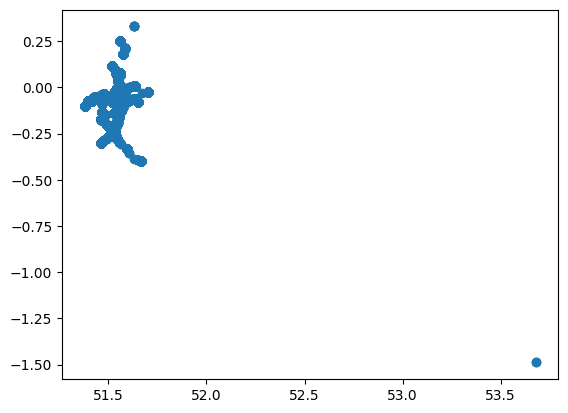

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x= EK_merged['Lat_OR'], y = EK_merged['Lon_OR'])

In [16]:
EK_merged[EK_merged['Lat_OR'] != EK_merged['Lat_OR'].max()].to_csv('../data/EK_all_1205.csv', index=False)

In [17]:
df = pd.read_csv('../data/EK_all_1205.csv')

/tmp/ipykernel_28618/1456311189.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/EK_all_1205.csv')


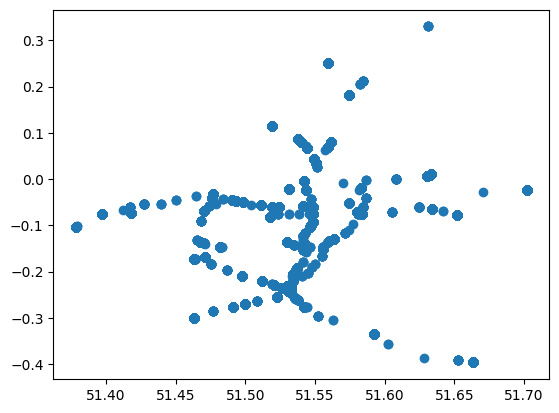

In [18]:
plt.scatter(x= df['Lat_OR'], y = df['Lon_OR'])